# Speech Understanding 
# Lecture 4: downloading, playing, processing, and plotting audio in jupyter



### Mark Hasegawa-Johnson, KCGI, October 29, 2022

For the next three lectures, we will leave the textbook.  The textbook uses high-performance speech recognizers and synthesizers.  Instead, we will spend three lectures creating a very simple, do-it-yourself speech recognizer and speech synthesizer.

In today's lecture, we will learn how to download, play, process, and plot audio in jupyter notebooks.

Here are the contents:
1. [Downloading Things from the Web: urllib](#section_urllib)
1. [Reading and Writing Files in Python](#section_files)
1. [Reading and Writing Soundfiles: soundfile](#section_soundfile)
1. [Playing Audio in jupyter notebooks: IPython.display.Audio](#section_ipython)
1. [Plotting the Waveform: matplotlib](#section_matplotlib)
1. [Computationally Efficient Numerical Computations in Python: numpy](#section_numpy)
1. [Computing the spectrum of a signal using np.fft.fft](#section_fft)
1. [Homework for Week 4](#homework)

<a id='section_urllib'></a>

## 1.  Downloading Things from the Web: [urllib](https://docs.python.org/3/library/urllib.request.html#module-urllib.request)

In order to download audio from the web, we will use [urllib](https://docs.python.org/3/library/urllib.request.html#module-urllib.request).  This module is part of the standard library, so it is already installed on your system.  

* If you just want to download a file from a known URL, you can use the `urllib.request.urlopen(...).read()` command shown below.
* If the URL is missing, or if you want to interactively explore a website, `urllib` contains a lot of features that can help you to do so.  It's even possible to program your own web browser.  We won't do that for this class.

In [1]:
import urllib.request

example_url = "https://catalog.ldc.upenn.edu/desc/addenda/LDC93S1.wav"

webdata = urllib.request.urlopen(example_url).read()

print("webdata is an object of type",type(webdata),", and it has the following content:", webdata)


webdata is an object of type <class 'bytes'> , and it has the following content: b'RIFF\xbem\x01\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80>\x00\x00\x00}\x00\x00\x02\x00\x10\x00data\x9am\x01\x00\x01\x00\xff\xff\x02\x00\x00\x00\x00\x00\x03\x00\x00\x00\x01\x00\xfd\xff\xfe\xff\x02\x00\x01\x00\x00\x00\x00\x00\x03\x00\x05\x00\x05\x00\x05\x00\x05\x00\x05\x00\x04\x00\x03\x00\x05\x00\x05\x00\x05\x00\x05\x00\x04\x00\x01\x00\x05\x00\x00\x00\x02\x00\x06\x00\x04\x00\x05\x00\x04\x00\x06\x00\x04\x00\x02\x00\x02\x00\xfd\xff\xff\xff\xfe\xff\x04\x00\x05\x00\x01\x00\xff\xff\xfe\xff\xfc\xff\xff\xff\x04\x00\x03\x00\x06\x00\x04\x00\x06\x00\x03\x00\x04\x00\x00\x00\x05\x00\x05\x00\x03\x00\xfd\xff\xff\xff\x00\x00\xfd\xff\x01\x00\x00\x00\xfd\xff\xfe\xff\x04\x00\xfe\xff\x00\x00\x04\x00\x02\x00\x03\x00\xfe\xff\xfd\xff\xfe\xff\x01\x00\x04\x00\x05\x00\x05\x00\x05\x00\x05\x00\x05\x00\x05\x00\x05\x00\x05\x00\x05\x00\x05\x00\x01\x00\x01\x00\xfe\xff\xfd\xff\xfe\xff\xfe\xff\xfe\xff\x01\x00\x03\x00\x05\x00\x05\x00\

<a id='section_files'></a>

## 2. [Reading and Writing Files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files) in Python

As you can see, `webdata` is an object of type `bytes`, and it contains binary data.  We know it's a sound file, but how can we tell python that it's a sound file?

There are several ways to do this.  The easiest way is to save it to disk.  

In order to do that, I need to introduce you to python's syntax for [reading and writing files on disk](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files).  There are three main things to know:

* The [open](https://docs.python.org/3/library/functions.html#open) command creates an opened file object.  The first argument is the name of the file.  The second argument specifies whether the file should be opened for reading (`"r"`) or for writing (`"w"`).  The second argument also includes the letter `"b"` if the file should be binary.  If `"b"` is omitted, the file is treated as text.
* The command `<fileobject>.write(webdata)` writes the data to the file.
* The command `<fileobject>.read()` reads data from the file.
* The command `<fileobject>.close()` closes the file.


In [2]:
f1 = open("webdata.wav", "wb")
f1.write(webdata)
f1.close()

f2 = open("webdata.wav", "rb")
filedata = f2.read()
f2.close()

print("")
print("* webdata is an object of type",type(webdata),"of length",len(webdata))
print("* filedata is an object of type",type(filedata),"of length",len(filedata))
print("")

if filedata != webdata:
    print("they are not the same")
else:
    print("they are the same")


* webdata is an object of type <class 'bytes'> of length 93638
* filedata is an object of type <class 'bytes'> of length 93638

they are the same


The method shown above is **not recommended!!!**.  If you forget to type `f.close()`, then your file will stay open, and your code will have memory leaks.  

The **recommended** method is to use a [with](https://docs.python.org/3/reference/compound_stmts.html#with) statement.  [with](https://docs.python.org/3/reference/compound_stmts.html#with) is a special command in python.  It means:
1. execute the `open` command,
1. keep the file open during the block of code following the `with` statement
1. when the block ends, automatically `close` the file.

In [3]:
with open("webdata.wav", "wb") as f:
    f.write(webdata)

with open("webdata.wav", "rb") as f:
    filedata = f.read()

print("")
print("* webdata is an object of type",type(webdata),"of length",len(webdata))
print("* filedata is an object of type",type(filedata),"of length",len(filedata))
print("")

if filedata != webdata:
    print("they are not the same")
else:
    print("they are the same")


* webdata is an object of type <class 'bytes'> of length 93638
* filedata is an object of type <class 'bytes'> of length 93638

they are the same


Now that you have written the data to the file `webdata.wav`, try this: double-click to open that file and listen to it!


<a id='section_soundfile'></a>

## 3. Reading and Writing Soundfiles: [soundfile](https://pysoundfile.readthedocs.io/en/latest/)

As you have seen, both `urllib` and `open` treat the audio data as unexplained binary.  If you want to interpret the binary data as **sound**, you need a module that understands sound.  For this purpose, my favorite module is [soundfile](https://pysoundfile.readthedocs.io/en/latest/) package.  Soundfile is not included in anaconda; you will need to open a terminal, and type:
```
pip install soundfile
```

Once you have done that, you should be able to run the following block:

In [13]:
import soundfile as sf

speech_wave, speech_rate = sf.read("webdata.wav")

print("")
print("The file webdata.wav is sampled at a frequency of", speech_rate, "samples per second")
print("It contains", len(speech_wave), "samples of audio, i.e.,", len(speech_wave)/speech_rate, "seconds")


The file webdata.wav is sampled at a frequency of 16000 samples per second
It contains 46797 samples of audio, i.e., 2.9248125 seconds


<a id='section_ipython'></a>

## 4. Playing audio in jupyter notebooks: [IPython.display.Audio](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html?highlight=display.audio#IPython.display.Audio)

If you now want to play the audio file in your jupyter notebook, that can be done using [IPython.display.Audio](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html?highlight=display.audio#IPython.display.Audio).  This module should be already available to you, because it comes with jupyter.

In [14]:
import IPython

IPython.display.Audio(data=speech_wave, rate=speech_rate)

<a id='section_matplotlib'></a>

## 5. Plotting the Waveform: [matplotlib](https://matplotlib.org/stable/tutorials/index.html)

[matplotlib](https://matplotlib.org/stable/tutorials/index.html) is a powerful plotting package.  Once you get used to it, you will want to do all of your plotting in python, because it is so powerful.

Let's start by plotting the waveform:

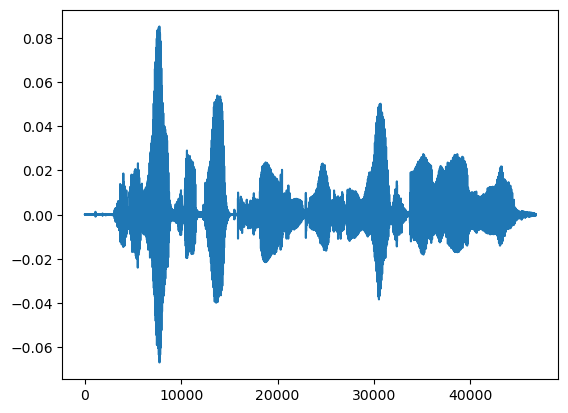

In [15]:
import matplotlib.pyplot as plt

plt.plot(speech_wave)

To learn a little more about matplotlib, let's do the very first example from the [matplotlib introductory tutorial page](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py):

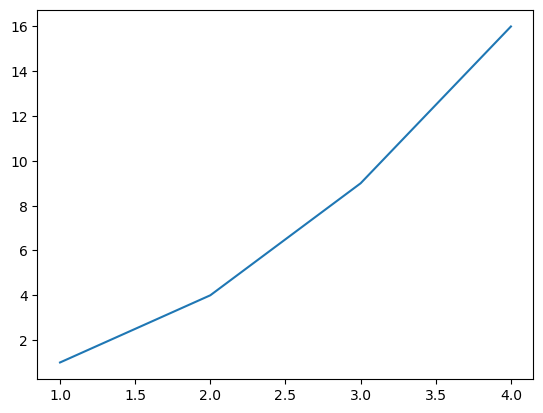

In [16]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

<a id='section_numpy'></a>

## 6. Computationally Efficient Numerical Computations in Python: [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html)

Using python `list` objects to store numerical data is not computationally efficient.  If the list only has 4 elements, computational efficiency doesn't matter.  But remember, `waveform` contains 46797 samples.  To efficiently process such large objects, we need a data structure that's more efficient than `list`.  Let's find out what it is.

In [17]:
print(type(speech_wave))

<class 'numpy.ndarray'>


`waveform` is an object of type `numpy.ndarray`.  This is an object defined by the [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) package.  [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) is a package that does computationally efficient numerical computations in python.  For example,

time_axis is an object of type <class 'numpy.ndarray'> with a length of 100
The first 5 samples on the time axis are [0.         0.06346652 0.12693304 0.19039955 0.25386607]
sine_wave is an object of type <class 'numpy.ndarray'> with a length of 100
The first 5 samples of the sine wave are [0.         0.06342392 0.12659245 0.18925124 0.25114799]


Text(0.5, 1.0, 'This is a sine wave')

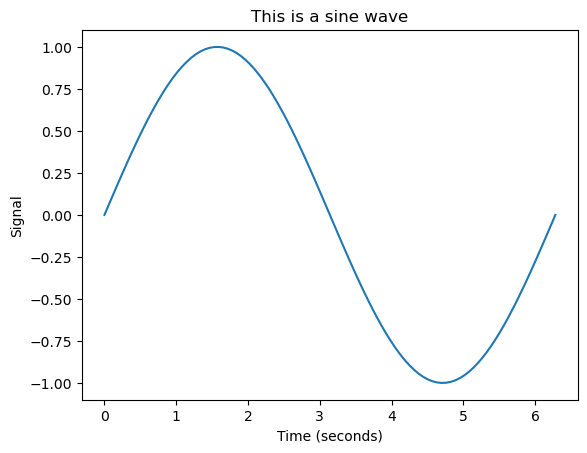

In [18]:
import numpy as np

time_axis = np.linspace(0,2*np.pi, 100)
print("time_axis is an object of type", type(time_axis), "with a length of", len(time_axis))
print("The first 5 samples on the time axis are",time_axis[:5])

sine_wave = np.sin(time_axis)
print("sine_wave is an object of type", type(sine_wave), "with a length of", len(sine_wave))
print("The first 5 samples of the sine wave are",sine_wave[:5])

plt.plot(time_axis, sine_wave)
plt.xlabel('Time (seconds)')
plt.ylabel('Signal')
plt.title('This is a sine wave')

Notice that we used:

* [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to generate 100 samples linearly spaced between $0$ and $2\pi$
* [np.pi](https://numpy.org/doc/stable/reference/constants.html#numpy.pi) is the numerical constant $\pi$, which is approximately 3.14159265...
* [np.sin](https://numpy.org/doc/stable/reference/generated/numpy.sin.html) to compute $\sin(t)$ for all of those 100 samples, all at the same time.

We can use the same trick to create a sine wave that we can listen to, but it needs to be much longer.  Let's use a samplerate of 16000 samples/second in order to create a pure tone at 500 cycles/second:

In [19]:
sine_duration = 0.5
sine_rate = 16000
sine_frequency = 500

time_axis = np.linspace(0, sine_duration, int(sine_duration*sine_rate))
sine_wave = np.sin(2 * np.pi * sine_frequency * time_axis)
print("The sine wave has", len(sine_wave), "samples.  Here is what it sounds like:")

IPython.display.Audio(data=sine_wave, rate=sine_rate)

The sine wave has 8000 samples.  Here is what it sounds like:


We can plot that sine wave, but we won't see very much, because the plot has to show us $500*0.5=250$ complete cycles:

Text(0.5, 1.0, 'A sine wave at 500Hz')

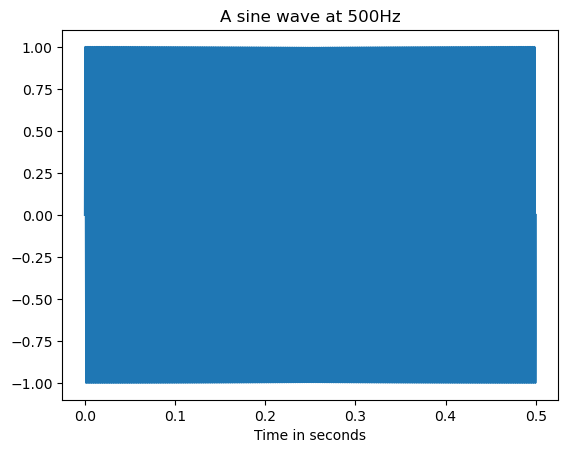

In [20]:
plt.plot(time_axis, sine_wave)
plt.xlabel('Time in seconds')
plt.title('A sine wave at 500Hz')

It's much more interesting to plot just a few cycles of the sine wave.  If there are 500 cycles per second, then 0.01 seconds will give us 5 cycles:

Text(0.5, 1.0, 'Five cycles from a 500Hz sine wave')

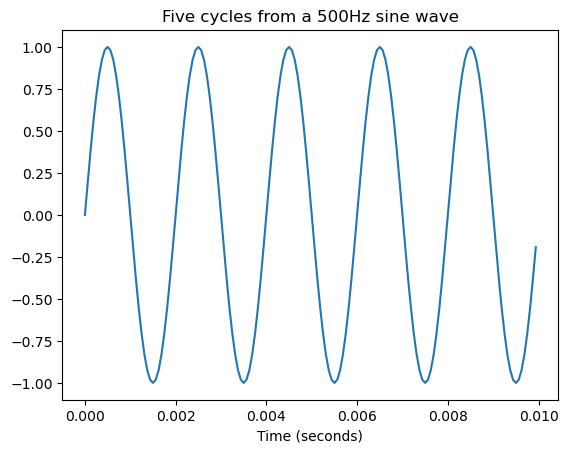

In [21]:
duration_to_plot = 0.01
samples_to_plot = int(duration_to_plot * sine_rate)
plt.plot(time_axis[:samples_to_plot], sine_wave[:samples_to_plot])
plt.xlabel('Time (seconds)')
plt.title("Five cycles from a 500Hz sine wave")

<a id="section_fft"></a>

## 7. Computing the spectrum of a signal using [np.fft.fft](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)

In lecture 1, we used [Praat](https://www.fon.hum.uva.nl/praat/) to compute the [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) of speech.  As you may remember, the spectrogram shows us the different frequencies that are present in the speech signal.  Can python do that?

Yes, yes it can!

In python, the spectrum (not the spectrogram) is computed by taking the [fast Fourier transform or FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform), and then computing its absolute value.  Here are a couple of examples:

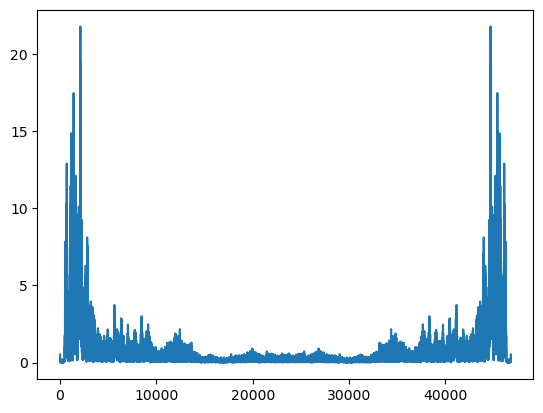

In [23]:
speech_spectrum = np.abs(np.fft.fft(speech_wave))
plt.plot(speech_spectrum)

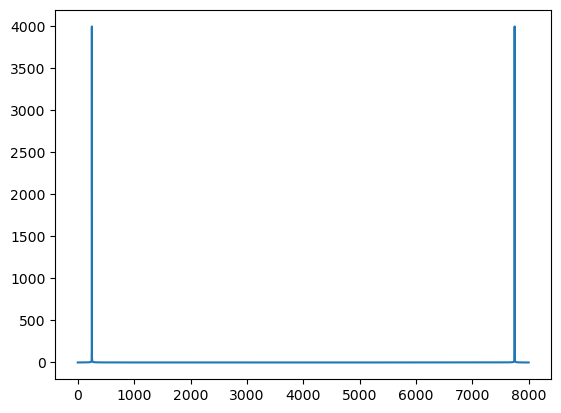

In [25]:
sine_spectrum = np.abs(np.fft.fft(sine_wave))
plt.plot(sine_spectrum)

Notice that

* `speech_spectrum` has energy at many different frequencies
* `sine_spectrum` has energy at only two frequencies.  Those two frequencies **should be** $f=+500$Hz, and $f=-500$Hz.  But the plot is not showing them at the correct frequencies.

In order to plot the energy at its true frequencies, we need to understand, a little better, what `np.fft.fft` does.

1. First, `np.fft.fft` returns a vector with the same length as its input:

In [26]:
print("The length of sine_wave is", len(sine_wave))
print("The length of sine_spectrum is", len(sine_spectrum))

The length of sine_wave is 8000
The length of sine_spectrum is 8000


2. The first half of `sine_spectrum` (the first 4000 elements, in this case) are the positive frequencies, linearly spaced between $0$ and $4000$Hz.
3. The second half of `sine_spectrum` (the last 4000 elements) are the negative frequencies, linearly spaced between $-4000$Hz and $0$Hz.  

So, to create an appropriate frequency axis, we should **concatenate** two **linspace** vectors:

The first 5 positive frequencies are [0. 2. 4. 6. 8.]
The first 5 negative frequencies are [-8000. -7998. -7996. -7994. -7992.]


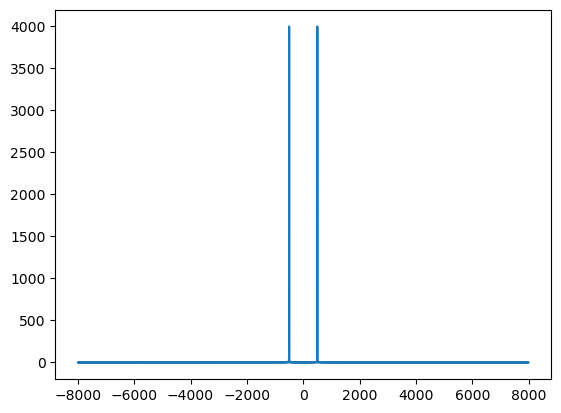

In [33]:
positive_frequencies = np.linspace(0, sine_rate/2, int(len(sine_spectrum)/2), endpoint=False)
print("The first 5 positive frequencies are", positive_frequencies[:5])
negative_frequencies = np.linspace(-sine_rate/2, 0, int(len(sine_spectrum)/2), endpoint=False)
print("The first 5 negative frequencies are", negative_frequencies[:5])

sine_frequencies = np.concatenate((positive_frequencies, negative_frequencies))
plt.plot(sine_frequencies, sine_spectrum)

* In order to see that the sine wave really has energy exactly at 500Hz, it's useful to zoom in:
* If you want to save the file as a PNG, you have to use the `plt.savefig` command.  If you are doing this in a jupyter window, then `plt.savefig` has to be part of the same cell in which the plot was created.

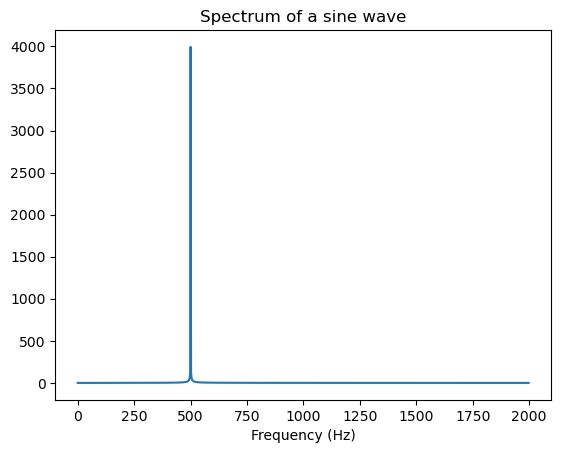

In [45]:
plt.plot(sine_frequencies[:1000], sine_spectrum[:1000])
plt.xlabel('Frequency (Hz)')
plt.title('Spectrum of a sine wave')
plt.savefig('sine_wave_spectrum.png')

<a id="homework"></a>

## Homework for Week 4

Homework will be manually graded on Gradescope.  You should submit 6 PNG files:

1. `sine_220Hz_wave.png` should show the first 20ms (0.02 seconds) from a sine wave at 220Hz.  The X-axis must have units of seconds.  The X-axis should be labeled `Time (seconds)`.  The title should say `Sine wave at 220Hz`.
1. `sine_440Hz_wave.png` should show the first 20ms (0.02 seconds) from a sine wave at 440Hz.  The X-axis must have units of seconds.  The X-axis should be labeled `Time (seconds)`.  The title should say `Sine wave at 440Hz`.
1. `sine_880Hz_wave.png` should show the first 20ms (0.02 seconds) from a sine wave at 880Hz.  The X-axis must have units of seconds.  The X-axis should be labeled `Time (seconds)`.  The title should say `Sine wave at 880Hz`.
1. `sine_220Hz_spectrum.png` should show the first 2000Hz (between 0Hz and 2000Hz) from the spectrum of a 220Hz sine wave.  The X-axis must have units of Hz (Hertz).  The X-axis should be labeled `Frequency (Hz)`.  The title should say `Spectrum of a 220Hz sine wave`.
1. `sine_440Hz_spectrum.png` should show the first 2000Hz (between 0Hz and 2000Hz) from the spectrum of a 440Hz sine wave.  The X-axis must have units of Hz (Hertz).  The X-axis should be labeled `Frequency (Hz)`.  The title should say `Spectrum of a 440Hz sine wave`.
1. `sine_880Hz_spectrum.png` should show the first 2000Hz (between 0Hz and 2000Hz) from the spectrum of an 880Hz sine wave.  The X-axis must have units of Hz (Hertz).  The X-axis should be labeled `Frequency (Hz)`.  The title should say `Spectrum of an 880Hz sine wave`.
